EDA ON VESSEL AI DATA
-

In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


IMPORT THE LIBRARIES
-

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

LOAD THE EXCEL SHEET
-

In [5]:
df = pd.read_csv('PDT.csv')
print(df.head)

<bound method NDFrame.head of        parcelNo vesselPositionStatus expectedArrivalDateAtLoadPort  \
0     P12472324      Completed At DP                       00:00.0   
1     P12492324      Completed At DP                       00:00.0   
2      P8222324      Completed At DP                       00:00.0   
3     P18782425      Completed At DP                       00:00.0   
4     P13242425      Completed At DP                       00:00.0   
...         ...                  ...                           ...   
2641  P14012425      Completed At DP                       00:00.0   
2642  P24292425      Completed At DP                       00:00.0   
2643  P23662425      Completed At DP                       00:00.0   
2644  P13442425      Completed At DP                       00:00.0   
2645   P1572122        Arrived at DP                       00:00.0   

     arrivedDateAtLoadPort expectedArrivalDateAtDischargePort  \
0                  00:00.0                            00:00.0   

UNDERSTANDING THE DATA
-

In [6]:
print(df.dtypes)

parcelNo                               object
vesselPositionStatus                   object
expectedArrivalDateAtLoadPort          object
arrivedDateAtLoadPort                  object
expectedArrivalDateAtDischargePort     object
arrivedDateAtDischargePort             object
blDate                                 object
blQuantity                            float64
customerGroup                          object
vendor                                 object
parcelType                             object
vesselName                             object
loadPortName                           object
dischargePortName                      object
vesselNo                               object
vesselType                             object
supplierDemurrageRate                 float64
cOO                                    object
mineName                               object
productName                            object
supplierGroup                          object
originWiseGrade                   

In [6]:
print(df.describe())

          blQuantity  supplierDemurrageRate
count    2644.000000            2340.000000
mean    70026.025826           22714.726923
std     31935.210740           10466.670466
min       727.000000            2500.000000
25%     50741.250000           17000.000000
50%     72137.500000           20000.000000
75%     82069.000000           26500.000000
max    181500.000000          250000.000000


In [7]:
print(df.isnull().sum())

parcelNo                                0
vesselPositionStatus                    2
expectedArrivalDateAtLoadPort          94
arrivedDateAtLoadPort                  97
expectedArrivalDateAtDischargePort    103
arrivedDateAtDischargePort            258
blDate                                  0
blQuantity                              2
customerGroup                           0
vendor                                 19
parcelType                              0
vesselName                              0
loadPortName                           16
dischargePortName                       0
vesselNo                                0
vesselType                              0
supplierDemurrageRate                 306
cOO                                    16
mineName                               16
productName                            16
supplierGroup                          16
originWiseGrade                        16
mineWiseGrade                         183
grade                             

CLEAN THE DATA
-

In [8]:
threshold = 0.5
df_cleaned = df.dropna(axis = 1, thresh = int((1-threshold) * len(df)))

In [9]:
df_cleaned = df.dropna()

In [10]:
print(df_cleaned.isnull().sum())

parcelNo                              0
vesselPositionStatus                  0
expectedArrivalDateAtLoadPort         0
arrivedDateAtLoadPort                 0
expectedArrivalDateAtDischargePort    0
arrivedDateAtDischargePort            0
blDate                                0
blQuantity                            0
customerGroup                         0
vendor                                0
parcelType                            0
vesselName                            0
loadPortName                          0
dischargePortName                     0
vesselNo                              0
vesselType                            0
supplierDemurrageRate                 0
cOO                                   0
mineName                              0
productName                           0
supplierGroup                         0
originWiseGrade                       0
mineWiseGrade                         0
grade                                 0
monthName                             0


In [11]:
df = df_cleaned.copy()

UNIVARIATE ANALYSIS
-

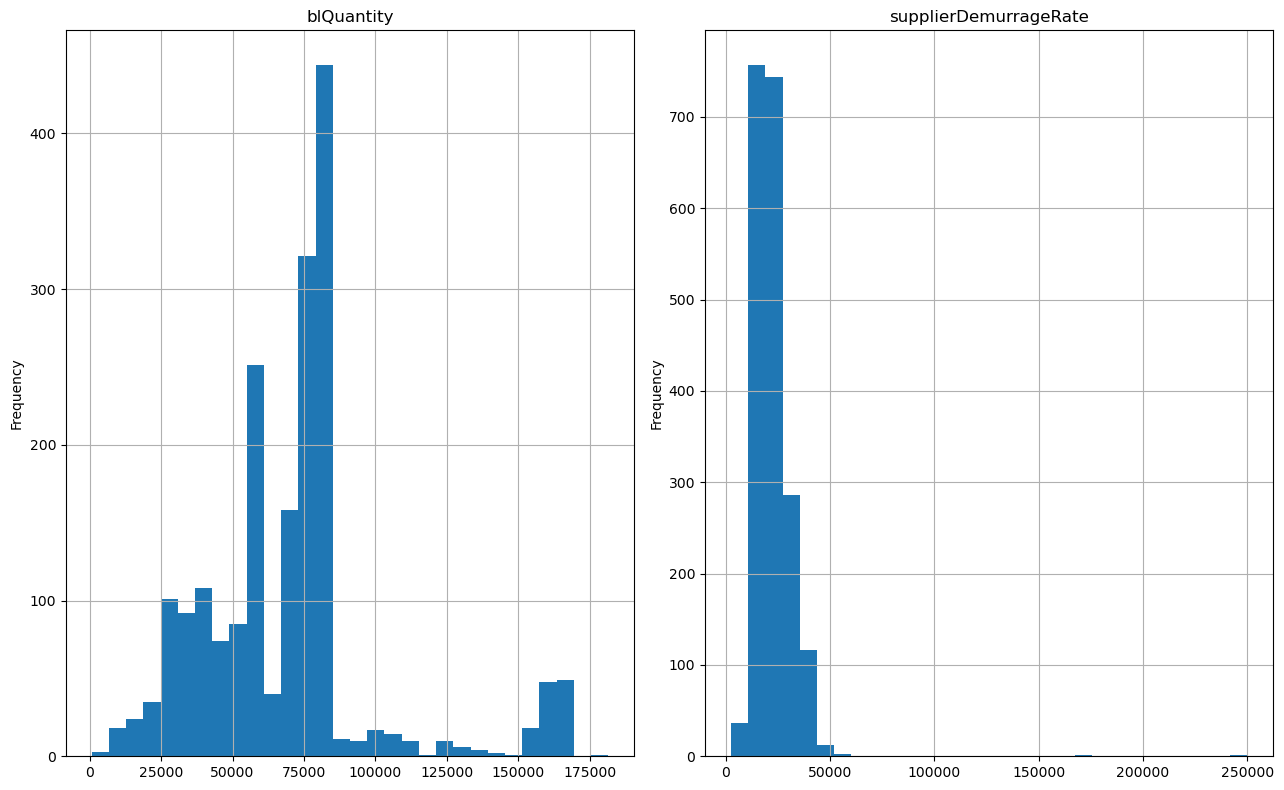

In [12]:
ax= df.hist(bins=30, figsize = (13,8))

for i in ax.flatten():
    i.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

blQuantity Insights
 -
 - Next most frequent is from 67500 to 80000
 - 500+ blquantities range from approx 80000 to 87500 
   

supplierDemurrageRate Insights
 -
 - 800+ rates range from 12500 to 25000

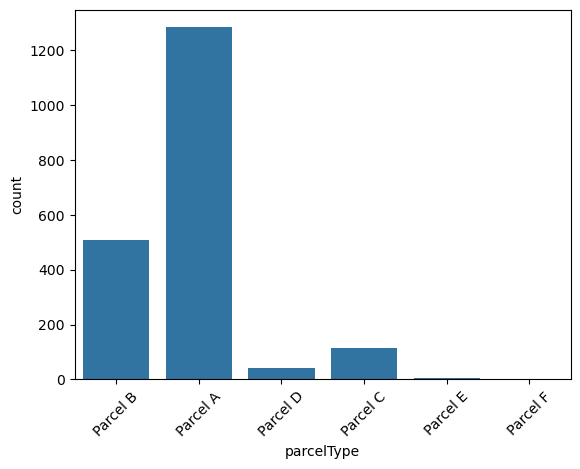

In [13]:
sns.countplot(x='parcelType', data=df)
plt.xticks(rotation=45)
plt.show()

Insights
 - 
 - Parcel A - Most frequently used
 - Least frequently used is Parcel D

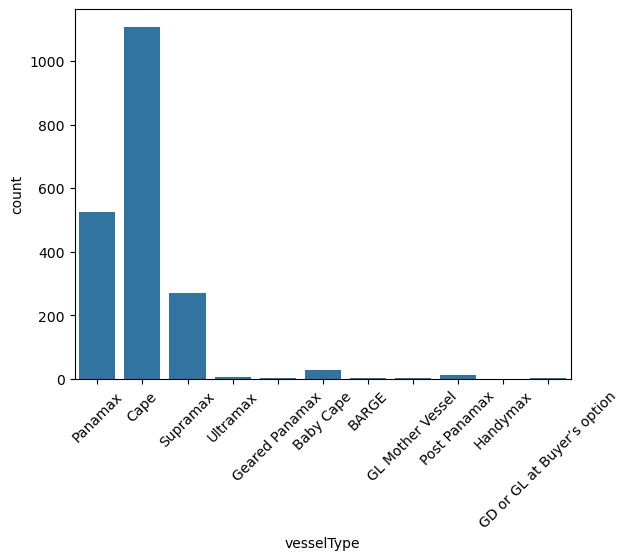

In [14]:
sns.countplot(x='vesselType', data=df)
plt.xticks(rotation=45)
plt.show()

Insights
 - 
 - Cape Vessel type is the most used - So manufacturing of Cape type should be done the most
 

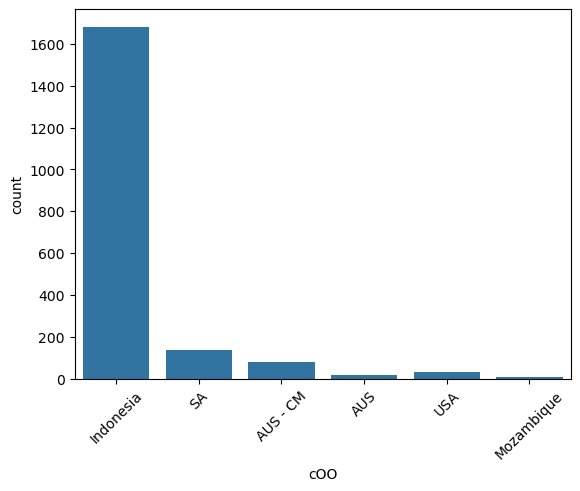

In [15]:
sns.countplot(x='cOO', data=df)
plt.xticks(rotation=45)
plt.show()

Insights
 - 
 - Indonesia is the highest exporter of coal for Adani
 - Then its South Africa and then USA

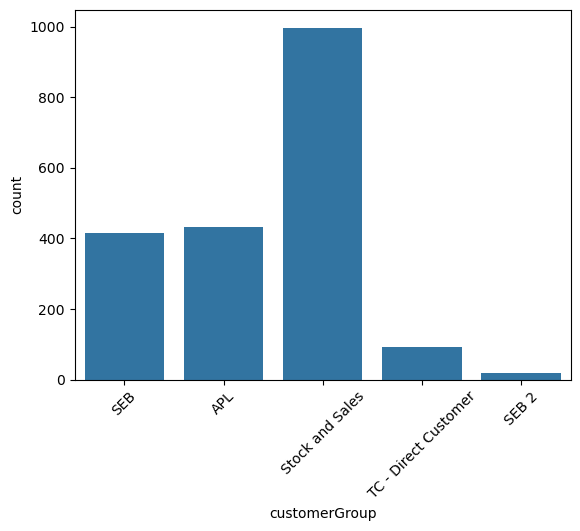

In [16]:
sns.countplot(x='customerGroup', data=df)
plt.xticks(rotation=45)
plt.show()

Insights
 - 
 - Stocks & Sales is the most frequent customerGroup & the least frequent customerGroup is SEB 2


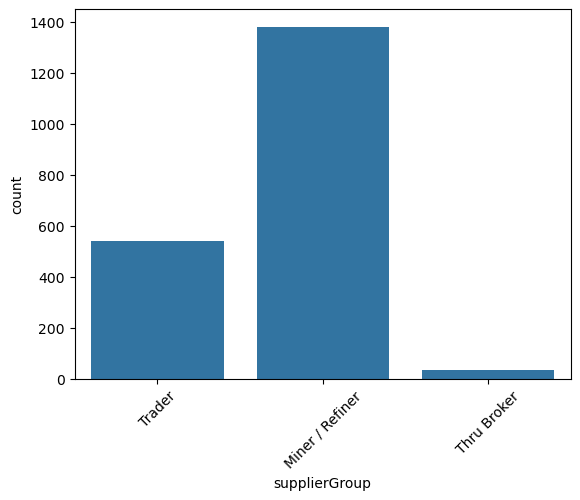

In [17]:
sns.countplot(x='supplierGroup', data=df)
plt.xticks(rotation=45)
plt.show()

Insights
 - 
 - Miner/Refiners are the biggest supplier Groups


BIVARIATE ANALYSIS
-

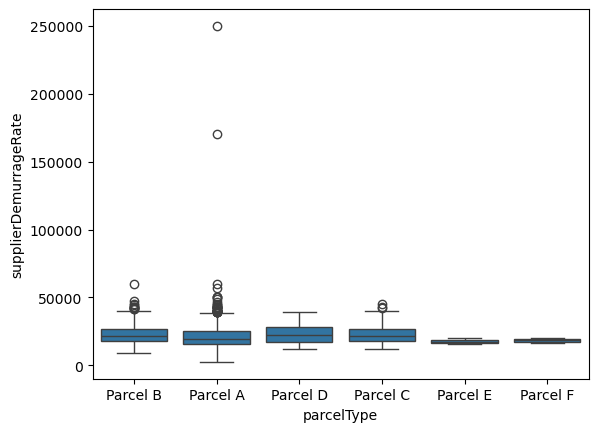

In [18]:
sns.boxplot(x='parcelType', y='supplierDemurrageRate', data=df)
plt.show()

Insights
 - 
 - Parcel A has the highest demurrage rate - used the most
 - Parcel D has the least

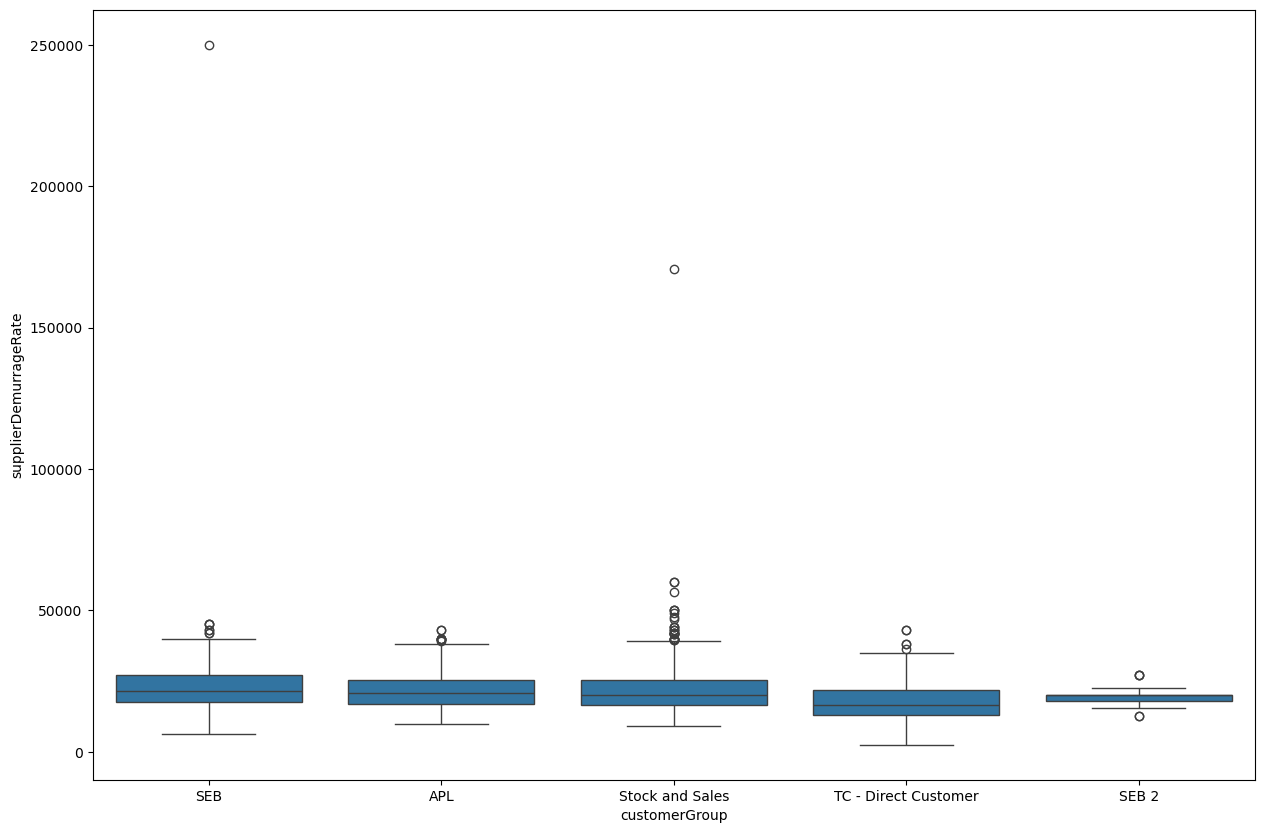

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x='customerGroup', y='supplierDemurrageRate', data=df)
plt.show()

In [20]:
df_sorted = df.sort_values('supplierDemurrageRate',ascending=False)

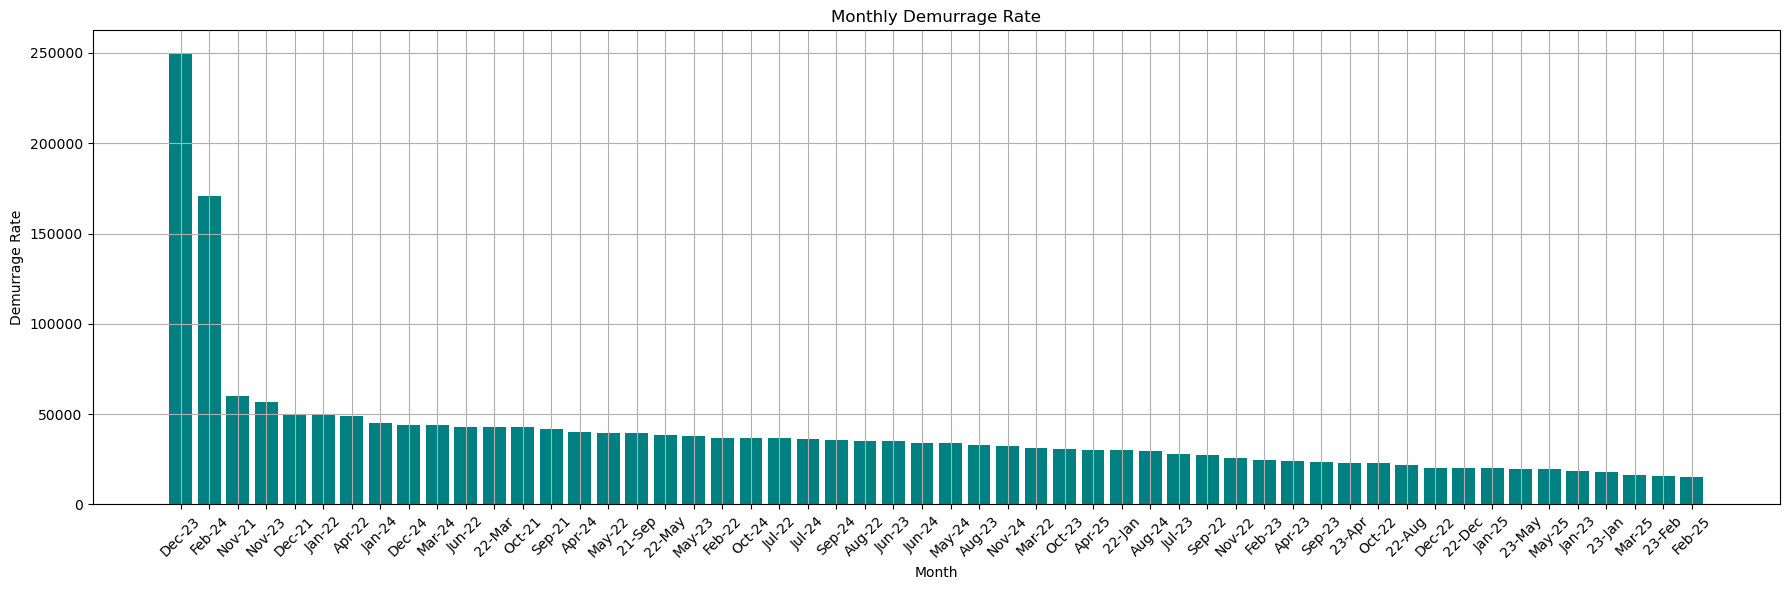

In [21]:
plt.figure(figsize=(18,6))
plt.bar(df_sorted['monthName'],df_sorted['supplierDemurrageRate'], color='teal')
plt.title('Monthly Demurrage Rate')
plt.xlabel('Month')
plt.ylabel('Demurrage Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Insights
-
- Decemeber 2023 has the highest Demurrage Rate
- Year 2025 had the lowest demurrage Rate

MULTIVARIATE ANALYSIS 
-

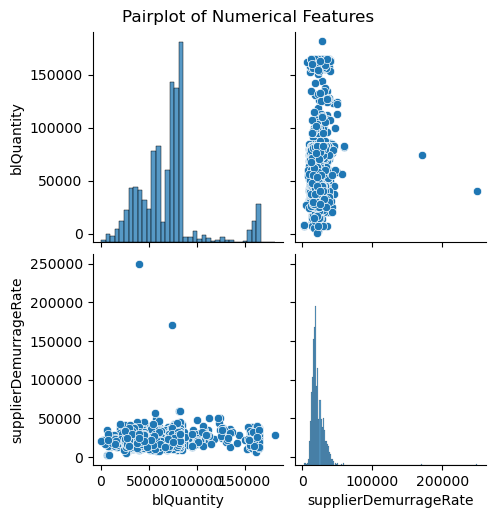

In [22]:
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

CORRELATION MATRIX
-

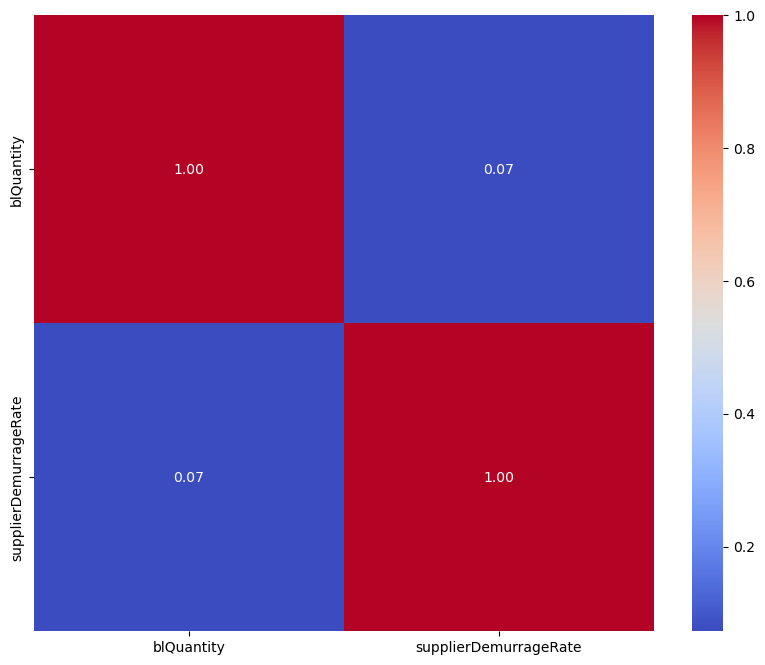

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap='coolwarm', fmt=".2f")
plt.show()

Insights
 - 
 - blQuantity & supplierDemurrageRate have very less correlation of 0.09

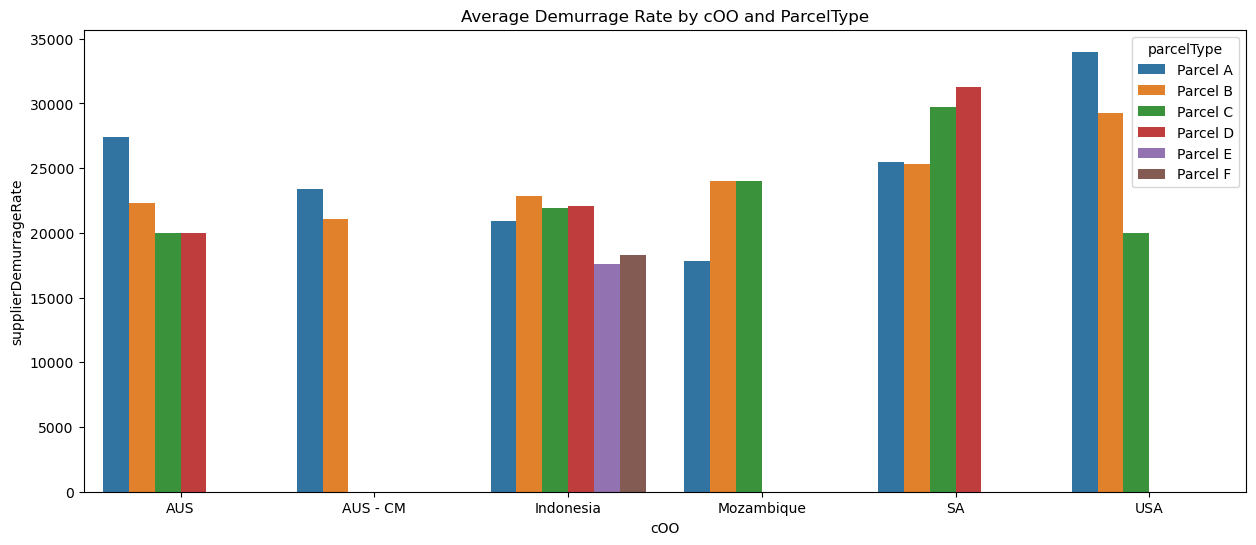

In [24]:
grouped_data = df.groupby(['cOO','parcelType'])['supplierDemurrageRate'].mean().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(data=grouped_data, x='cOO', y='supplierDemurrageRate',hue='parcelType')
plt.title("Average Demurrage Rate by cOO and ParcelType")
plt.show()

Insights
- 
- Parcel A in USA has the highest demurrage rate.
- Parcel D in SA also has a high demurrage rate.
- Parcel types in certain places should be avoided which have high demurrage rate.

PREDICTIVE ANALYSIS
-

In [25]:
print(df.select_dtypes(include = 'object').columns)

Index(['parcelNo', 'vesselPositionStatus', 'expectedArrivalDateAtLoadPort',
       'arrivedDateAtLoadPort', 'expectedArrivalDateAtDischargePort',
       'arrivedDateAtDischargePort', 'blDate', 'customerGroup', 'vendor',
       'parcelType', 'vesselName', 'loadPortName', 'dischargePortName',
       'vesselNo', 'vesselType', 'cOO', 'mineName', 'productName',
       'supplierGroup', 'originWiseGrade', 'mineWiseGrade', 'grade',
       'monthName'],
      dtype='object')


In [26]:
model = LinearRegression()
X=df[['blQuantity']]
y=df['supplierDemurrageRate']
model.fit(X,y)

LinearRegression()

In [27]:
monthly_preds = df.groupby('monthName')['supplierDemurrageRate'].mean()

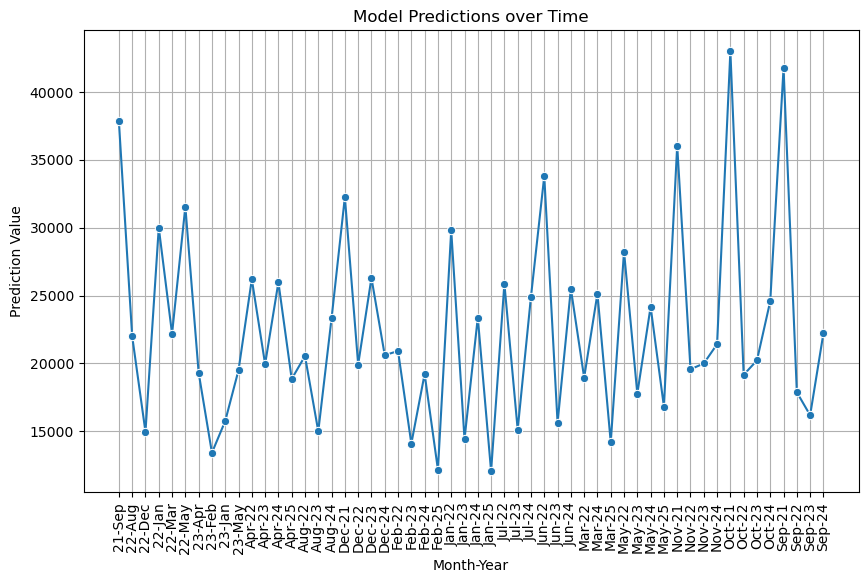

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_preds.index, y=monthly_preds.values, marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Prediction Value')
plt.title('Model Predictions over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Insights
-
-Predicted Demurrage Values vs Month-Years


In [32]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [43]:
df['monthName'] = pd.to_datetime(df['monthName'], format='%b-%y', dayfirst=True,errors='coerce')
df['Formatted_monthName'] = df['monthName'].dt.strftime('%Y-%m')

print(df['Formatted_monthName'])

0       2023-10
1       2023-11
3       2024-08
4       2024-05
5       2024-06
         ...   
2637    2021-11
2639    2024-03
2641    2023-12
2644    2024-05
2645    2022-03
Name: Formatted_monthName, Length: 1956, dtype: object


17:11:22 - cmdstanpy - INFO - Chain [1] start processing
17:11:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\intern.ai7\AppData\Local\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


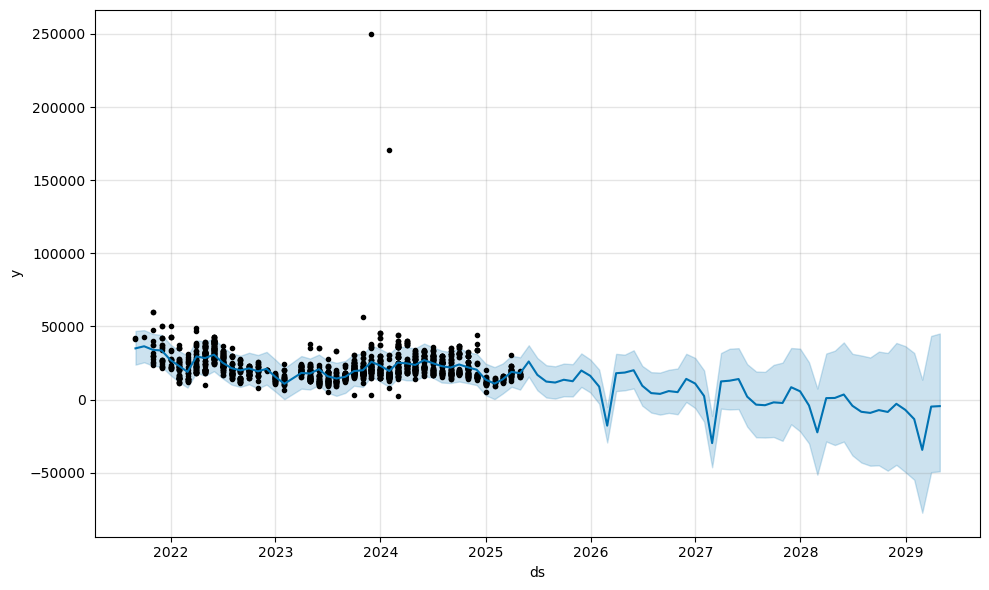

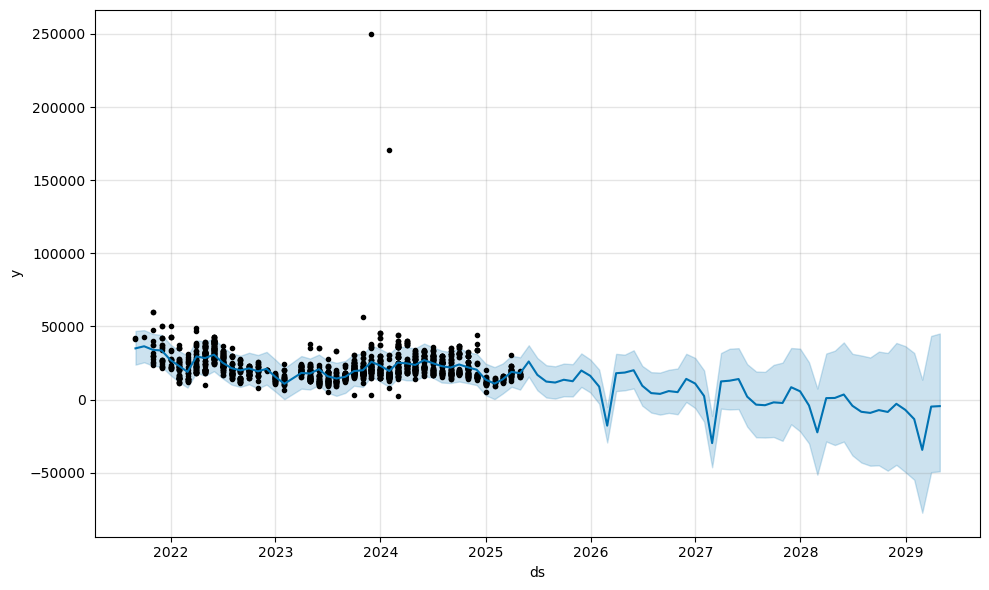

In [57]:
from prophet import Prophet

df_prophet = df[['Formatted_monthName', 'supplierDemurrageRate']].rename(columns={'Formatted_monthName':'ds', 'supplierDemurrageRate':'y'})
df_prophet = df_prophet.dropna(subset=['ds'])

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=48, freq='M')
forecast = model.predict(future)

model.plot(forecast)

Insights
-
- We can see that according to the predictions, the demurrage rate will gradually decrease over the years